<a href="https://colab.research.google.com/github/petermin123/Peter_Min_Data_Engineering_Project9/blob/main/Project_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 9

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def read_spotify_data(filename):
    return pd.read_csv(filename, encoding="latin-1")


def generate_summary_stats(df: pd.DataFrame):
    return df.describe()


def generate_summary_for_stream_count(df):
    df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
    df.dropna(subset=["streams"], inplace=True)

    stream_median = df["streams"].median()
    stream_max = df["streams"].max()
    stream_min = df["streams"].min()
    return (stream_median, stream_max, stream_min)


def generate_bar_chart_for_most_popular_artists(df: pd.DataFrame):
    df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
    df.dropna(subset=["streams"], inplace=True)

    # Create bar chart for 10 hottest songs reflected in stream counts
    top_artists = df.groupby("artist(s)_name")["streams"].sum().nlargest(10)
    plt.figure(figsize=(10, 6))
    top_artists.plot(kind="bar", color="blue")
    plt.title("10 Hottest Artists by Total Stream Count")
    plt.xlabel("Artists")
    plt.ylabel("Total Streams")
    plt.xticks(rotation=45)
    plt.show()

In [9]:
df = read_spotify_data("./sample_data/spotify-2023.csv")
generate_summary_stats(df)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [13]:
median, max, min = generate_summary_for_stream_count(df)
print(f"Median stream count: {median}\nMax stream count: {max}\nMin stream count: {min}")

Median stream count: 290530915.0
Max stream count: 3703895074.0
Min stream count: 2762.0


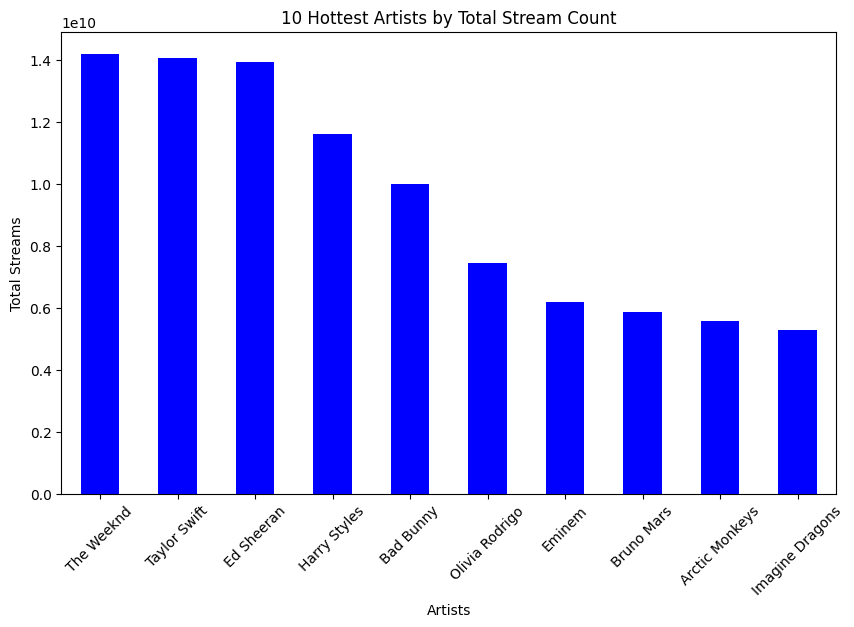

In [14]:
generate_bar_chart_for_most_popular_artists(df)